In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#loading dataset
df=pd.read_csv(r'file:///C:\Users\SHAKIR\OneDrive\Desktop\DATASET\titanic_dataset%20(1).csv')

In [3]:

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.shape

(891, 12)

### Checking for null values

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

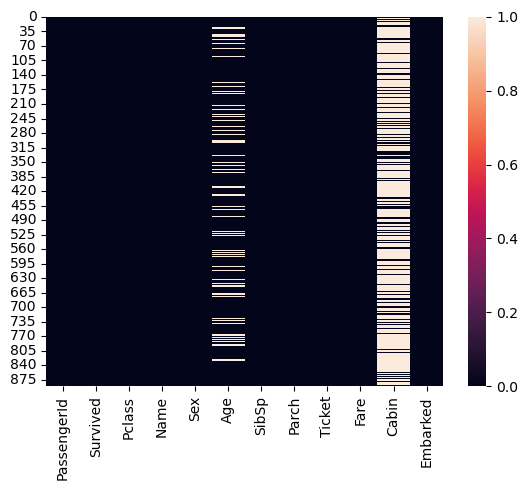

In [8]:
sns.heatmap(df.isnull());#plotting heatmap of null values present in the dataset 

In [9]:
df.isnull().sum()*100/len(df)#percentage of null values

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### Handling null values

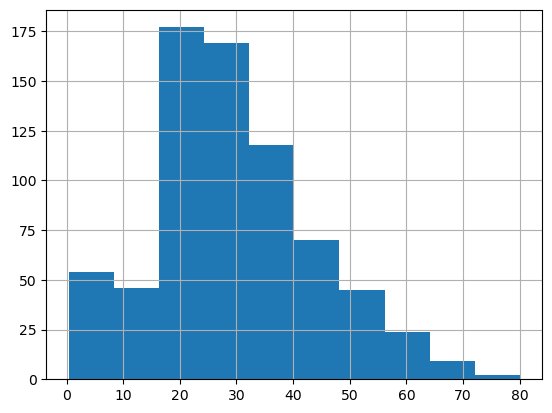

In [10]:
#checking the distribution of Age columns
df['Age'].hist();

##### From the above plotted histogram of Age column we can infer tha it is slightly right skewed,so median can be used to fill null values

In [11]:
df['Age'].fillna(df['Age'].median(),inplace=True)#filling null values in Age c

In [12]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)#Emabrked column 

In [13]:
df[['Age','Embarked']].isnull().sum()#checking for null values 

Age         0
Embarked    0
dtype: int64

#### Checking for duplicated rows

In [14]:

df[df.duplicated(subset='Ticket',keep='first')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


### Ticket no is duplicated for 210 rows.

In [15]:

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
df[['PassengerId','Name','Ticket']].nunique()#checking for uniqu

PassengerId    891
Name           891
Ticket         681
dtype: int64

#### a) PassengerId,Name and Ticket columns contain only unique values , So those columns can be dropped

#### b) Cabin column contains null of about 77%,so Cabin column can also be dropped.

In [18]:
df1=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)#dro

In [19]:
df1.head(3)#df1 is the new dataframe
     

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


## Checking for Correlation

In [20]:
corr=df1.corr()

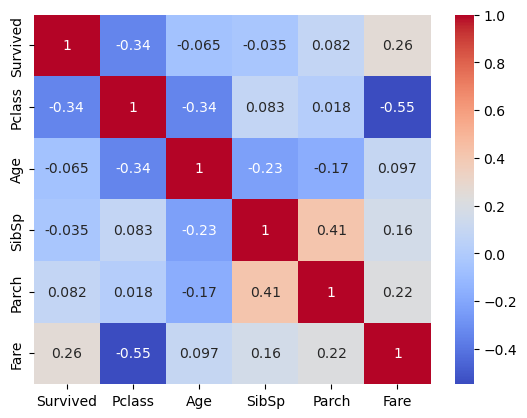

In [21]:

#plotting df1.corr() using heatmap
sns.heatmap(corr,cmap='coolwarm',annot=True);

#### 1.There is negative correlation value of 0.55 between Pclass and Fare columns.


#### 2.There is positive correlation value of 0.41 between SibSp and Parch columns.

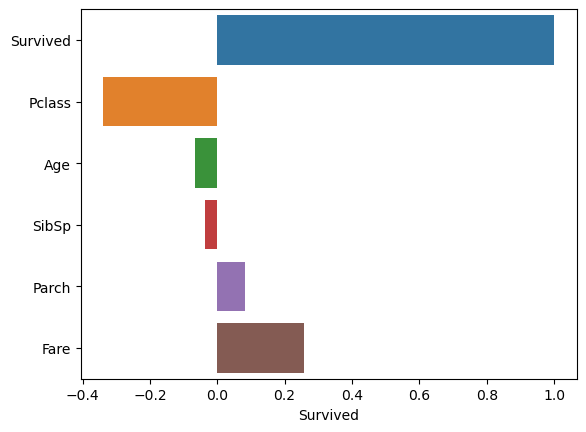

In [22]:
sns.barplot(x=corr.Survived,y=corr.columns);#Barplot of correlat

Survived column is negatively correlated with Pclass ,Age, Sibsp and positively correlated with Parch and Fare columns.But there is no highly positive or negative correlations with any of these columns.

## Outlier checking(using boxplot)

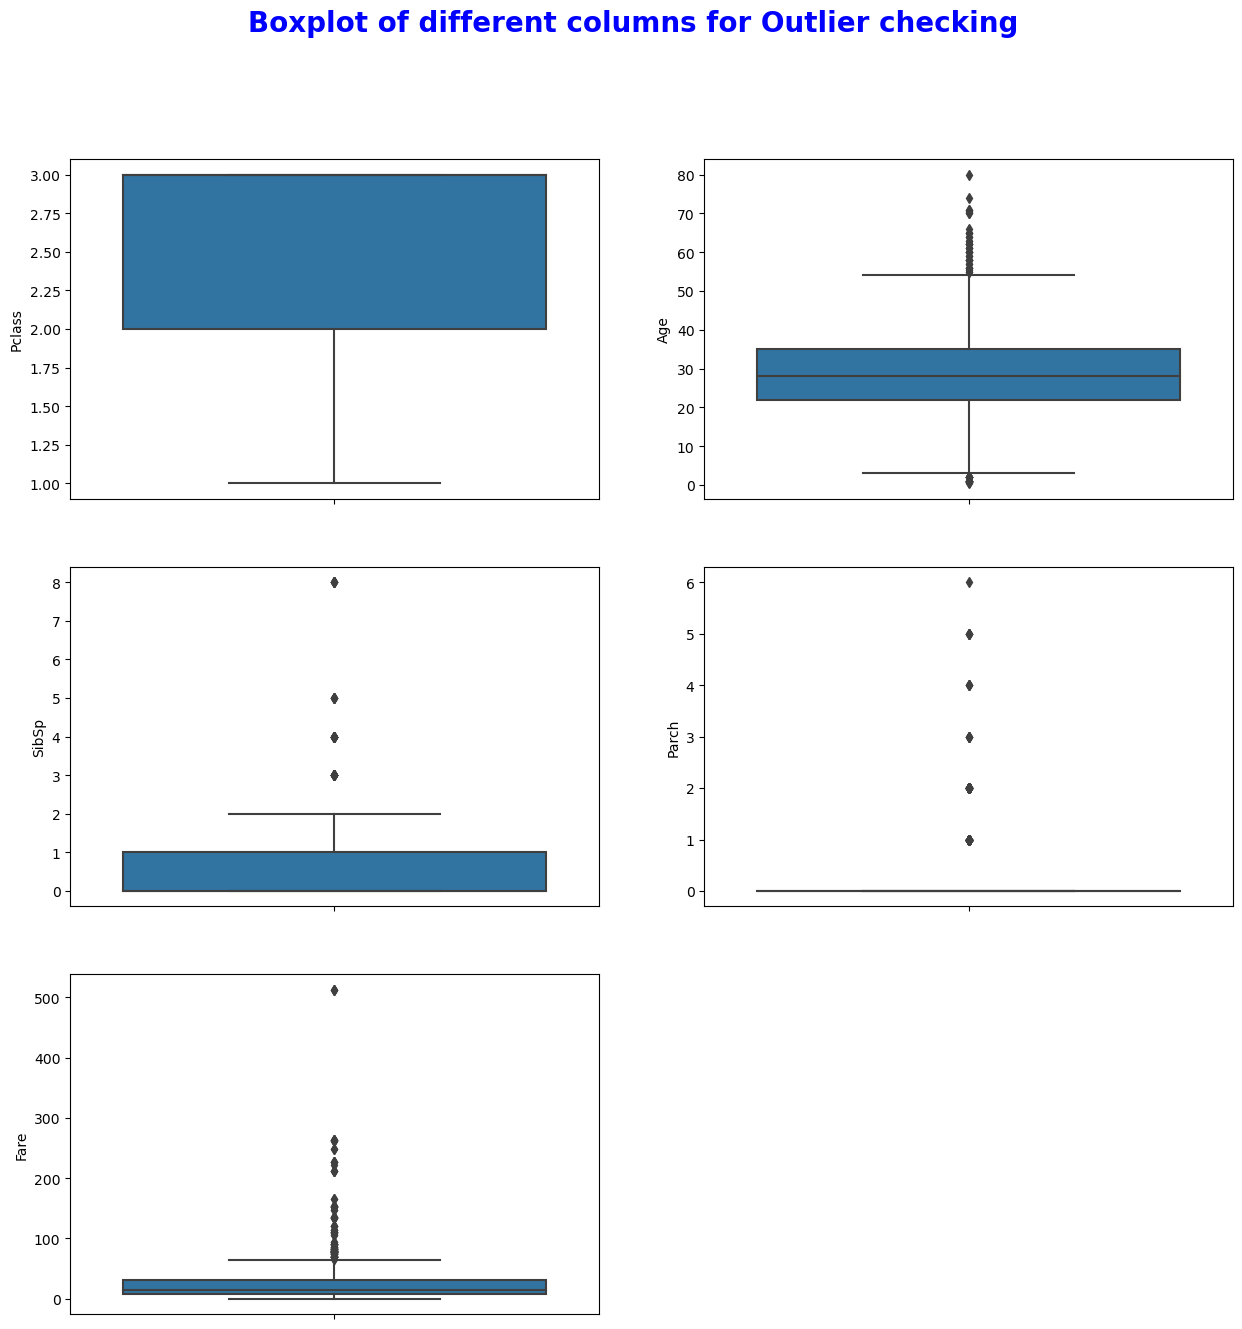

In [24]:

plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
sns.boxplot(data=df1,y='Pclass')
plt.subplot(3,2,2)
sns.boxplot(data=df1,y='Age')
plt.subplot(3,2,3)
sns.boxplot(data=df1,y='SibSp')
plt.subplot(3,2,4)
sns.boxplot(data=df1,y='Parch')
plt.subplot(3,2,5)
sns.boxplot(data=df1,y='Fare')
plt.suptitle('Boxplot of different columns for Outlier checking',fontsize=20,fontweight='bold',color='b');

###  One Hot Encoding

In [25]:
df1=pd.get_dummies(df1)

In [26]:
df1.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1


The target column Survived is categorical, so Classification algorithms are used for building models.

## 1.KNN (Lazy Learning Algorithm) Model

In [27]:
x=df1.drop('Survived',axis=1)#x contains the independent variables
y=df1['Survived']#y is the target or dependent variable
     

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)#Hold Out method

In [30]:
from sklearn.neighbors import KNeighborsClassifier#importing knn classifier
metric_knn=[]#empty list for appending accuracy of model for each k values
n_neighbors=np.arange(3,15)#k value from 3 to 14

In [32]:

#for classification algorithm models for validation checking confusion matrix,accuracy score,precision score and recall score can be used
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score

In [33]:
for k in n_neighbors:#for loop for looping through each k values
 knn_clf=KNeighborsClassifier(n_neighbors=k)#creating an instance of knn classifier
 model_knn=knn_clf.fit(x_train,y_train)#model creation
 y_pred_knn=model_knn.predict(x_test)#predicting using xtest
 acc=accuracy_score(y_test,y_pred_knn)#accuracy calculations
 metric_knn.append(acc)#appending accuracy of model for each k values

C:\Users\SHAKIR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\SHAKIR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

In [34]:
metric_knn#printing the accuracy score values array

[0.7130044843049327,
 0.6860986547085202,
 0.7040358744394619,
 0.7174887892376681,
 0.7174887892376681,
 0.7130044843049327,
 0.7085201793721974,
 0.7130044843049327,
 0.6995515695067265,
 0.6995515695067265,
 0.6905829596412556,
 0.6995515695067265]

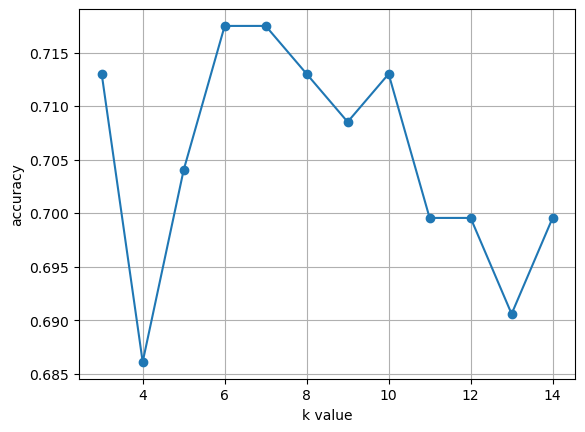

In [36]:

#Ploting line graph of accuracy of model for each value of k 
plt.plot(n_neighbors,metric_knn,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

From the above plotte k value vs accuracy plot we can infer that maximum accuracy of 71.74% is for k value=6

In [37]:
#accuracy is more for k=6,so creating model using k=6
knn_clf=KNeighborsClassifier(n_neighbors=6)
model_knn=knn_clf.fit(x_train,y_train)
y_pred_knn=model_knn.predict(x_test)

C:\Users\SHAKIR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [38]:
print(confusion_matrix(y_test,y_pred_knn))#confusion matrix

[[116  18]
 [ 45  44]]


In [39]:
print(accuracy_score(y_test,y_pred_knn))#accuracy score

0.7174887892376681


In [40]:
print(precision_score(y_test,y_pred_knn))#precision score=the numb

0.7096774193548387


In [41]:
print(recall_score(y_test,y_pred_knn))#recall score=count of true positives in a correct manner out of all the actual positive values.

0.4943820224719101


In [42]:
print(f1_score(y_test,y_pred_knn))#f1_score

0.5827814569536423


### a) K Fold Cross Validation of KNN Model

In [43]:
from sklearn.model_selection import KFold#importing K-Folds cross-validator
     

In [44]:
kfold_validator_knn=KFold(10,shuffle=True,random_state=42)#no of folds=

In [45]:
for train_index,test_index in kfold_validator_knn.split(x,y):
  print('Training Index',train_index)
  print('Testing Index',test_index)

Training Index [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  24  25  26  27  28  29  31  32  33  34  35  36  37
  38  40  41  42  43  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  64  65  68  69  71  73  74  75  76  77  78  79  80
  81  82  83  84  85  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 111 112 113 114 115 116 117 118
 119 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 138 139
 140 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 169 170 171 172 173 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 193 194 195 197 199
 200 201 202 203 205 206 207 209 212 213 214 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 236 237 238 239 240 241
 242 243 245 246 247 248 249 251 252 253 255 256 257 258 259 260 261 262
 263 264 265 267 268 269 270 271 272

In [46]:
from sklearn.model_selection import cross_val_score# cross_val_score evaluate a score by cross-validation.
     

In [48]:

cv_result_knn=cross_val_score(model_knn,x,y,cv=kfold_validator_knn)#calculating the k fold cross validation scores

C:\Users\SHAKIR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\SHAKIR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

In [55]:

cv_result_knn=cross_val_score(model_knn,x,y,cv=kfold_validator_knn)#calculating the k fold cross validation scores

C:\Users\SHAKIR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\SHAKIR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

In [50]:
print(accuracy_score(y_test,y_pred_knn))#accuracy score
     

0.7174887892376681


In [56]:

cv_result_knn#k fold cross validation scores

array([0.76666667, 0.69662921, 0.6741573 , 0.74157303, 0.66292135,
       0.69662921, 0.68539326, 0.71910112, 0.70786517, 0.78651685])

In [57]:
np.mean(cv_result_knn)#mean of k fold cross validation scores

0.7137453183520599

#### b) Stratified K Fold Cross Validation of KNN Model

In [60]:

from sklearn.model_selection import StratifiedKFold
#import StratifiedKFold cross validator

In [61]:
skfold_validator=StratifiedKFold(n_splits=10)#no of folds=10

In [62]:

for train_index,test_index in skfold_validator.split(x,y):
  print('Training Index',train_index)
  print('Testing Index',test_index)

Training Index [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332

In [63]:
skcv_result_knn=cross_val_score(model_knn,x,y,cv=skfold_validator)# cross_val_score evaluate a score by cross-validation.

C:\Users\SHAKIR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\SHAKIR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

In [64]:
skcv_result_knn#stratified k fold cross validation scores


array([0.61111111, 0.70786517, 0.69662921, 0.76404494, 0.74157303,
       0.68539326, 0.76404494, 0.70786517, 0.69662921, 0.75280899])

In [65]:
np.mean(skcv_result_knn)#mean of stratified k fold cross validation score

0.712796504369538

## 2.SVM(Support Vector Machine) Model

In [66]:
from sklearn.svm import SVC#support vector classifier

In [67]:
svm_clf=SVC(kernel='rbf')#kernel choosen is rbf(default)

In [68]:
svm_model=svm_clf.fit(x_train,y_train)#Hold Out method

In [69]:
y_pred_svm=svm_model.predict(x_test)

In [70]:
confusion_matrix(y_test,y_pred_svm)#confusion matrix of svm model

array([[125,   9],
       [ 66,  23]], dtype=int64)

In [71]:
accuracy_score(y_test,y_pred_svm)#accuracy score 

0.6636771300448431

In [72]:
precision_score(y_test,y_pred_svm)#precision score

0.71875

In [73]:

recall_score(y_test,y_pred_svm)#recall score

0.25842696629213485

In [74]:

f1_score(y_test,y_pred_svm)#f1 score

0.3801652892561984

### a) K FOLD Cross Validation of SVM Model

In [75]:
kfold_validator_svm=KFold(10,shuffle=True,random_state=42)#no of folds=10,shuffle =True to avoid fit failed warning  error ,random_state=42 

In [76]:
for train_index,test_index in kfold_validator_svm.split(x,y):
  print('Training Index',train_index)
  print('Testing Index',test_index)

Training Index [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  24  25  26  27  28  29  31  32  33  34  35  36  37
  38  40  41  42  43  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  64  65  68  69  71  73  74  75  76  77  78  79  80
  81  82  83  84  85  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 111 112 113 114 115 116 117 118
 119 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 138 139
 140 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 169 170 171 172 173 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 193 194 195 197 199
 200 201 202 203 205 206 207 209 212 213 214 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 236 237 238 239 240 241
 242 243 245 246 247 248 249 251 252 253 255 256 257 258 259 260 261 262
 263 264 265 267 268 269 270 271 272

In [77]:
cv_result_svm=cross_val_score(svm_model,x,y,cv=kfold_validator_svm)

In [78]:
cv_result_svm#k fold cross validation scores

array([0.7       , 0.62921348, 0.6741573 , 0.75280899, 0.6741573 ,
       0.68539326, 0.65168539, 0.64044944, 0.61797753, 0.76404494])

In [79]:
np.mean(cv_result_svm)#mean of k fold cross validation scores

0.6789887640449439

### b) Stratified K Fold Cross Validation of SVM Model

In [80]:
skfold_validator_svm=StratifiedKFold(n_splits=10)#no of folds=10

In [81]:
for train_index,test_index in skfold_validator_svm.split(x,y):
  print('Training Index',train_index)
  print('Testing Index',test_index)

Training Index [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332

In [83]:
skcv_result_svm=cross_val_score(svm_model,x,y,cv=skfold_validator_svm)

In [84]:
skcv_result_svm#stratified k fold cross validation scores

array([0.62222222, 0.58426966, 0.68539326, 0.74157303, 0.69662921,
       0.69662921, 0.68539326, 0.71910112, 0.70786517, 0.6741573 ])

In [85]:
np.mean(skcv_result_svm)#mean of stratified k fold cross validation scores
     

0.6813233458177278

### Conclusion

In [87]:


print('THE AVERAGE K FOLD CROSS VALIDATION SCORE OF KNN MODEL IS:',np.mean(cv_result_knn))
print('\n')
print('THE AVERAGE K FOLD CROSS VALIDATION SCORE OF SVM MODEL IS:',np.mean(cv_result_svm))
print('\n')
print('THE AVERAGE STRATIFIED CROSS VALIDATION SCORE OF KNN MODEL IS:',np.mean(skcv_result_knn))
print('\n')
print('THE AVERAGE STRATIFIED CROSS VALIDATION SCORE OF SVM MODEL IS:',np.mean(skcv_result_svm))

THE AVERAGE K FOLD CROSS VALIDATION SCORE OF KNN MODEL IS: 0.7137453183520599


THE AVERAGE K FOLD CROSS VALIDATION SCORE OF SVM MODEL IS: 0.6789887640449439


THE AVERAGE STRATIFIED CROSS VALIDATION SCORE OF KNN MODEL IS: 0.712796504369538


THE AVERAGE STRATIFIED CROSS VALIDATION SCORE OF SVM MODEL IS: 0.6813233458177278


##### a) Both the averages of K Fold Cross Validation Scores and Stratified Cross Validation Scores of KNN model are more than SVM Model scores.
.

#### b) So KNN Model performed better than SVM Model on Titanic Dataset.